In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
N = 1000

I0 = 1                            #number of initial people infected
R0 = 0                            #number of initial people recovered
E0 = 1/N                          #number of initial people exposed
D0 = 0                            #number of initial people dead
S0 = N - I0 - R0 - E0 - D0        #number of initial people suseptible

beta = 2                          #rate of spread, prob of transmitting
gamma = 0.5                       #recovery rate
rho = 0.5                         #quarantined (1=no one is quarentined, 0=everyone is)
sigma = 0.2                       #incubation period/ time you're infectious
phi=0.03                          #death rate
mu = 0.001                        #rate you become susceptible again after getting it (instead of indefinite immunity)

t = np.linspace(0, 250, 250)      #days run - note this has an interesting trend if you set it to run for longer

# SEIRS model using differential equations
def deriv(y, t, N, beta, mu, gamma, phi, sigma, rho):
    S, I, R, E, D = y
    dSdt = - rho*beta*S*I /N +mu*R
    dEdt = rho*beta*S*I /N - sigma*E 
    dIdt = sigma*E - gamma*I
    dRdt = gamma * I - phi*I - mu*R
    dDdt = phi*I
    return dSdt, dIdt, dRdt, dEdt, dDdt

y0 = S0, I0, R0, E0, D0           #set initial conditions as a vector

#Integrate the SIR equations over time, t
ret = odeint(deriv, y0, t, args=(N, beta, mu, gamma, phi, sigma, rho))
S, I, R, E, D = ret.T

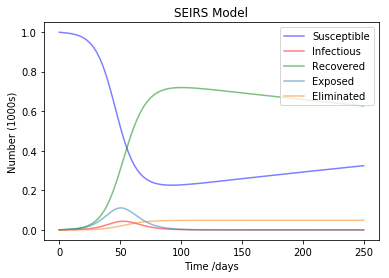

In [4]:
plt.plot(t, S/N, 'b', alpha=0.5, label='Susceptible')
plt.plot(t, I/N, 'r', alpha=0.5, label='Infectious')
plt.plot(t, R/N, 'g', alpha=0.5, label='Recovered')
plt.plot(t, E/N, alpha=0.5, label='Exposed')
plt.plot(t, D/N, alpha=0.5, label="Eliminated")
plt.title('SEIRS Model')
plt.xlabel('Time /days')
plt.ylabel('Number (1000s)')
plt.legend(loc='upper right')
plt.show()